# Week 1 - Getting Started

# Exercises

In [21]:
a = "The quick brown fox jumps over the lazy dog"
b = 1234567890.0

* Print the variable `a` in all uppercase
* Print the variable `a` with every other letter in uppercase
* Print the variable `a` in reverse, i.e. god yzal ...
* Print the variable `a` with the words reversed, i.e. ehT kciuq ...
* Print the variable `b` in scientific notation with 4 decimal places

In [33]:
print(a.upper())

soln = ''
upper = True
for letter in a:
    if letter == ' ':
        soln += ' '
        continue
    if upper:
        soln += letter.upper()
    else:
        soln += letter.lower()
    upper = not upper
print(soln)

print(''.join(a[-1::-1]))

words = a.split()
print(' '.join([word[-1::-1] for word in words]))

print('{0:.4e}'.format(b))

THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG
ThE qUiCk BrOwN fOx JuMpS oVeR tHe LaZy DoG
god yzal eht revo spmuj xof nworb kciuq ehT
ehT kciuq nworb xof spmuj revo eht yzal god
1.2346e+09


In [42]:
people = [{'name': 'Bob', 'age': 35}, 
          {'name': 'Alice', 'age': 30}, 
          {'name': 'Eve', 'age': 20},
          {'name': 'Gail', 'age': 30},
          {'name': 'Dennis', 'age': 25},
          {'name': 'Charlie', 'age': 35}, 
          {'name': 'Fred', 'age': 25},]

* Print the items in `people` as comma seperated values
* Sort `people` so that they are ordered by age, and print
* Sort `people` so that they are ordered by age first, and then their names, i.e. Bob and Charlie should be next to each other due to their ages with Bob first due to his name.

In [45]:
for person in people:
    print('{0}, {1}'.format(person['name'], person['age']))


people.sort(key=lambda x: x['age'])
print(people)

# Unfortunately people are already sorted in such a way that satisfies the third problem
# First let's reverse the order so we can see the sorting process working
people.reverse()
print('Reversed people:', people)
people.sort(key=lambda x: x['name']) # Apply sorts in reverse order, name is secondary so we sort on name first
people.sort(key=lambda x: x['age'])
print(people)

Eve, 20
Fred, 25
Dennis, 25
Gail, 30
Alice, 30
Charlie, 35
Bob, 35
[{'age': 20, 'name': 'Eve'}, {'age': 25, 'name': 'Fred'}, {'age': 25, 'name': 'Dennis'}, {'age': 30, 'name': 'Gail'}, {'age': 30, 'name': 'Alice'}, {'age': 35, 'name': 'Charlie'}, {'age': 35, 'name': 'Bob'}]
Reversed people: [{'age': 35, 'name': 'Bob'}, {'age': 35, 'name': 'Charlie'}, {'age': 30, 'name': 'Alice'}, {'age': 30, 'name': 'Gail'}, {'age': 25, 'name': 'Dennis'}, {'age': 25, 'name': 'Fred'}, {'age': 20, 'name': 'Eve'}]
[{'age': 20, 'name': 'Eve'}, {'age': 25, 'name': 'Dennis'}, {'age': 25, 'name': 'Fred'}, {'age': 30, 'name': 'Alice'}, {'age': 30, 'name': 'Gail'}, {'age': 35, 'name': 'Bob'}, {'age': 35, 'name': 'Charlie'}]


* Write a function that returns the first n prime numbers
* Given a list of coordinates calculate the distance using the (Euclidean distance)[https://en.wikipedia.org/wiki/Euclidean_distance]
* Given a list of coordinates arrange them in such a way that the distance traveled is minimized (the itertools module may be useful).


In [2]:
coords = [(0,0), (10,5), (10,10), (5,10), (3,3), (3,7), (12,3), (10,11)]


def first_n_primes(n):
    primes = []
    i = 2
    while len(primes) < n:
        for p in primes:
            if i % p == 0:
                # i is not a prime
                break
        else:
            primes.append(i)
        i += 1
    return primes

print(first_n_primes(20))

def distance(coords):
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance


print(distance(coords))

import itertools # Documentation is at https://docs.python.org/3.5/library/itertools.html

all_options = []
for option in itertools.permutations(coords, len(coords)):
    all_options.append((option, distance(option)))
all_options.sort(key=lambda x: x[1])

print('Shortest route:', distance(all_options[0][0]), all_options[0][0])
#print('All routes:', all_options)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]
50.55551882981089
Shortest route: 25.775638600922246 ((12, 3), (10, 5), (10, 10), (10, 11), (5, 10), (3, 7), (3, 3), (0, 0))


* Print the standard deviation of each row in a numpy array
* Print only the values greater than 90 in a numpy array
* From a numpy array display the values in each row in a seperate plot (the subplots method may be useful)

In [60]:
np.random.seed(0)
a = np.random.randint(0, 100, size=(10,20))

[[44 47 64 67 67  9 83 21 36 87 70 88 88 12 58 65 39 87 46 88]
 [81 37 25 77 72  9 20 80 69 79 47 64 82 99 88 49 29 19 19 14]
 [39 32 65  9 57 32 31 74 23 35 75 55 28 34  0  0 36 53  5 38]
 [17 79  4 42 58 31  1 65 41 57 35 11 46 82 91  0 14 99 53 12]
 [42 84 75 68  6 68 47  3 76 52 78 15 20 99 58 23 79 13 85 48]
 [49 69 41 35 64 95 69 94  0 50 36 34 48 93  3 98 42 77 21 73]
 [ 0 10 43 58 23 59  2 98 62 35 94 67 82 46 99 20 81 50 27 14]
 [41 58 65 36 10 86 43 11  2 51 80 32 54  0 38 19 46 42 56 60]
 [77 30 24  2  3 94 98 13 40 72 19 95 72 26 66 52 67 61 14 96]
 [ 4 67 11 86 77 75 56 16 24 29 21 25 80 60 61 83 33 32 70 85]]
[ 25.08804496  28.47011591  21.7795202   30.07972739  28.97667165
  28.50697283  31.07008207  23.401923    32.10681392  27.20087315]
[99 91 99 99 95 94 93 98 98 94 99 94 98 95 96]


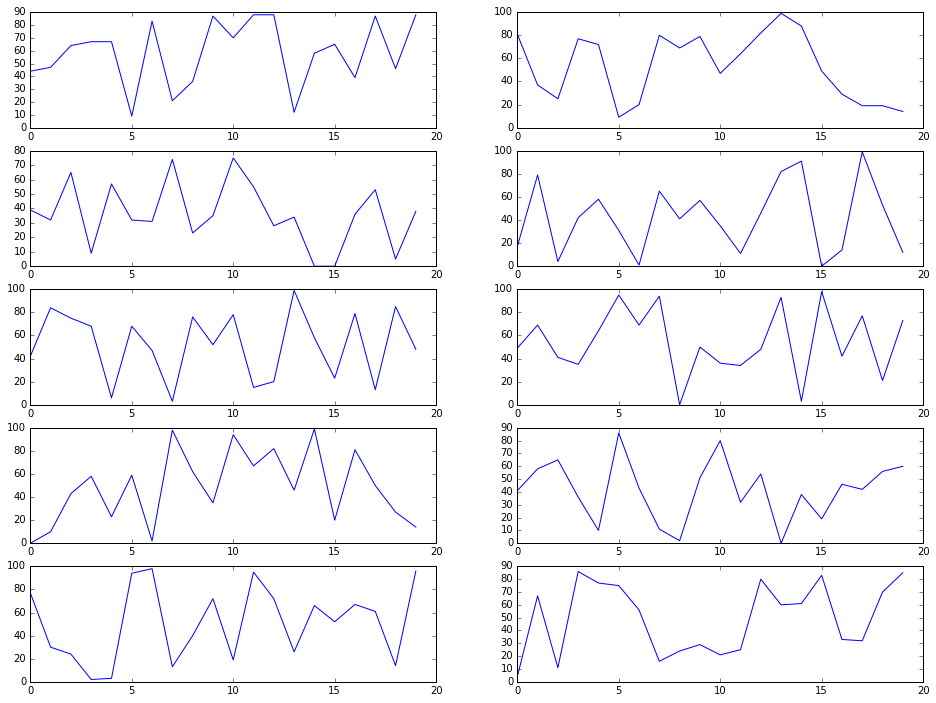

In [66]:
print(a)
print(a.std(axis=1))
print(a[a>90])

fig, axes = plt.subplots(5,2, figsize=(16,12))
for i,ax in zip(range(a.shape[0]), axes.flatten()):
    ax.plot(a[i])
plt.show()